In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xg
from sklearn.metrics import explained_variance_score

In [2]:
path = "D:/python/baron/05_Loop current Events"
file = ["2015-08-07","2015-08-08","2015-09-03","2015-09-09"]
dfs = []
for i in range(4):
    filenames = glob.glob(path + "/" + file[i] + "/*.txt")
    cols = []
    for filename in filenames:
        cols.append(pd.read_csv(filename, index_col=None, header=None))
    df = pd.DataFrame(pd.concat(cols, axis=1, ignore_index=None))
    df.columns = ['AIRGAP1' , 'AIRGAP2' , 'AIRGAP3' , 'AIRGAP4' , 'CURRENT_DEPTH1' ,
              'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' , 'CURRENT_DEPTH5' ,
              'CURRENT_DEPTH6' , 'CURRENT_DEPTH7' , 'CURRENT_DIRECTION1' , 'CURRENT_DIRECTION2' , 
              'CURRENT_DIRECTION3' , 'CURRENT_DIRECTION4' , 'CURRENT_DIRECTION5' , 'CURRENT_DIRECTION6' , 
              'CURRENT_DIRECTION7' , 'CURRENT_SPEED1' , 'CURRENT_SPEED2' , 'CURRENT_SPEED3' , 'CURRENT_SPEED4' ,
              'CURRENT_SPEED5' , 'CURRENT_SPEED6' , 'CURRENT_SPEED7' , 'MOORING1_LENGTH',  'MOORING1_TENSION1' ,
              'MOORING1_TENSION2' , 'MOORING2_LENGTH' , 'MOORING2_TENSION1' , 'MOORING2_TENSION2' ,
              'MOORING3_LENGTH' , 'MOORING3_TENSION1' , 'MOORING3_TENSION2' , 'MOORING4_LENGTH' ,
              'MOORING4_TENSION1' , 'MOORING4_TENSION2' , 'MOORING5_LENGTH' , 'MOORING5_TENSION1' ,
              'MOORING5_TENSION2' , 'MOORING6_LENGTH' , 'MOORING6_TENSION1' , 'MOORING6_TENSION2' ,
              'MOORING7_LENGTH' , 'MOORING7_TENSION1' , 'MOORING7_TENSION2' , 'MOORING8_LENGTH' , 
              'MOORING8_TENSION1' , 'MOORING8_TENSION2' , 'MOORING9_LENGTH' , 'MOORING9_TENSION1' ,
              'MOORING9_TENSION2' , 'MOTION_TILTX' , 'MOTION_TILTY' , 'MOTION_YAW' , 'POSITION_X' ,
              'POSITION_Y' , 'WIND1_DIRECTION' , 'WIND1_SPEED' , 'WIND2_DIRECTION' , 'WIND2_SPEED']
    df = df.drop(['CURRENT_DEPTH1' , 'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' ,
                'CURRENT_DEPTH5' , 'CURRENT_DEPTH6' , 'CURRENT_DEPTH7'],axis=1)
    dfs.append(df)
df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]
df4 = dfs[3]

In [31]:
X = df3.drop(["MOORING1_TENSION1"],axis=1)
y = df3["MOORING1_TENSION1"]
X_train = X.iloc[:69120,]
y_train = y.iloc[:69120,]
X_test = X.iloc[69120:,]
y_test = y.iloc[69120:,]

In [25]:
xg_model = xg.XGBRegressor(boostern_estimators=50, learning_rate=0.05, gamma=0.01, subsample=0.75,
                           colsample_bytree=1, max_depth=3)
xg_model.fit(X_train,y_train)

[15:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "boostern_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', boostern_estimators=50,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0.01, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.75, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
predictions = xg_model.predict(X_test)

In [33]:
r_sq_train = xg_model.score(X_train,y_train)
r_sq_test = xg_model.score(X_test,y_test)
print(r_sq_train,r_sq_test)

0.4778379369582164 0.6273962780951747


In [34]:
print(explained_variance_score(predictions,y_test))

0.9873841097626063


In [7]:
num1 = np.linspace(0,17279,17280)
num2 = np.linspace(0,69119,69120)

(380.0, 520.0)

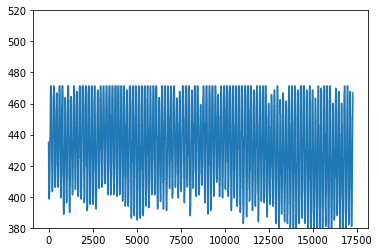

In [35]:
plt.plot(num1,predictions)
plt.ylim(3,480)

<AxesSubplot:>

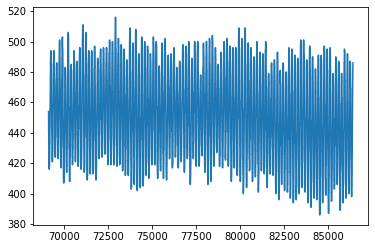

In [36]:
y[69120:].plot()